In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm
import cv2
import os

Filename: NGC4501_DESI_gi.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (3000, 3000, 2)   float32   
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                 3000 / length of data axis 1                          NAXIS2  =                 3000 / length of data axis 2                          NAXIS3  =                    2 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H SURVEY  = 'LegacySurvey'                                                        VERSION = 'DR10    '                

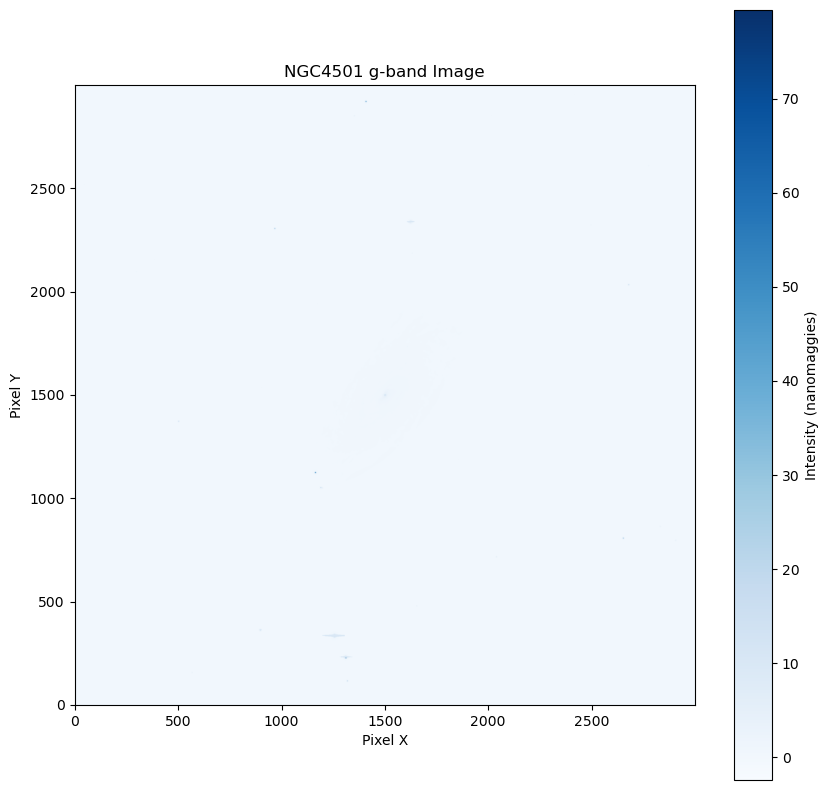

maximum value in g-band flux: 79.45272
minimum value in g-band flux: -2.4318612
maximum value in i-band flux: 61.083447
minimum value in i-band flux: -3.9779925
maximum value in g-band flux: (np.int64(227), np.int64(1312))
maximum value in i-band flux: (np.int64(807), np.int64(2653))


In [2]:
# Load the FITS file (update the filename as needed)
filename = "NGC4501_DESI_gi.fits"
object_name = filename.split('_')[0]
hdul = fits.open(filename)

# Display the structure of the FITS file
hdul.info()

# Assuming the image data is in the primary HDU (index 0)
data = hdul[0].data

# Optionally, print header information to see details about the observation
header = hdul[0].header
print(header)

# Close the FITS file after loading data (optional but recommended)
hdul.close()

g_band_flux = data[0]  # Assuming the first slice is the g-band flux
i_band_flux = data[1]  # Assuming the second slice is the i-band flux

# Plot the data using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(g_band_flux, cmap='Blues', origin='lower')
plt.colorbar(label='Intensity (nanomaggies)')
plt.title(f"{object_name} g-band Image")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

# Check satruration
print("maximum value in g-band flux:", np.max(g_band_flux))
print("minimum value in g-band flux:", np.min(g_band_flux))
print("maximum value in i-band flux:", np.max(i_band_flux))
print("minimum value in i-band flux:", np.min(i_band_flux))
# localize the maxinum value
print("maximum value in g-band flux:", np.unravel_index(np.argmax(g_band_flux), g_band_flux.shape))
print("maximum value in i-band flux:", np.unravel_index(np.argmax(i_band_flux), i_band_flux.shape))

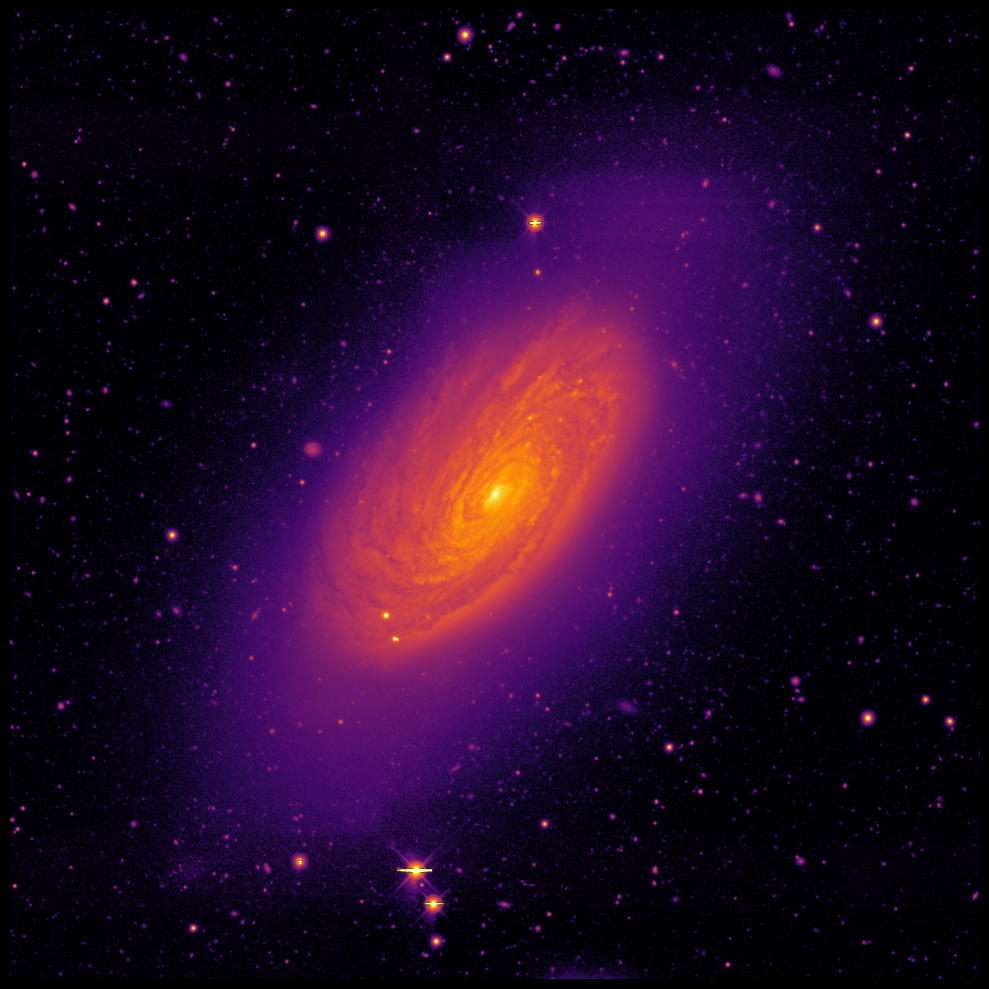

In [9]:
plt.figure(figsize=(10, 10))
plt.style.use('dark_background')  # Set black background
# use only positive values for log scaling
vmin = g_band_flux[g_band_flux > 0].min()
vmax = g_band_flux.max()
im = plt.imshow(g_band_flux, cmap='inferno', origin='lower',
                norm=LogNorm(vmin=1e-3, vmax=5))

# plt.title(f"{object_name} g-band Image")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.axis('off')  # Remove axes for cleaner look
plt.tight_layout()
plt.savefig(f"{object_name}_g_band.png", dpi=400, bbox_inches='tight')
plt.show()

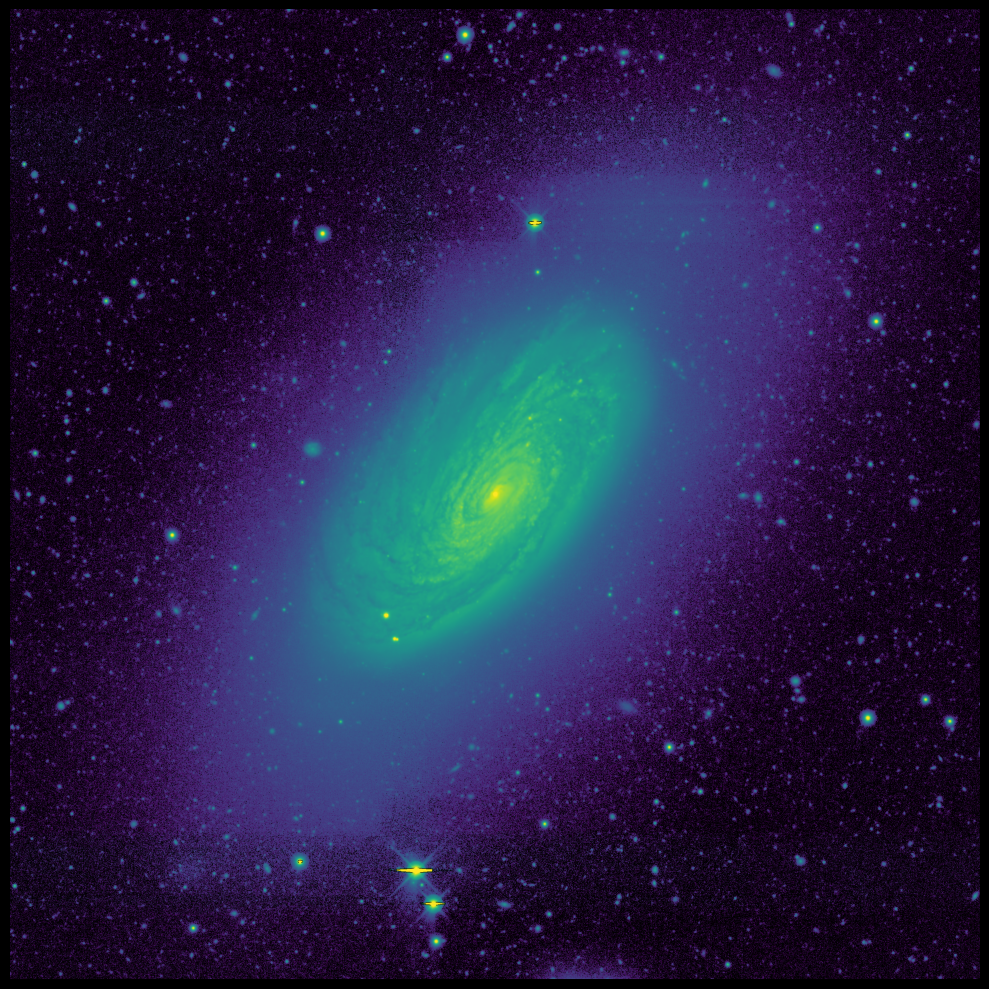

In [18]:
plt.figure(figsize=(10, 10))
plt.style.use('dark_background')  # Set black background
# use only positive values for log scaling
vmin = g_band_flux[g_band_flux > 0].min()
vmax = g_band_flux.max()
im = plt.imshow(g_band_flux, cmap='viridis', origin='lower',
                norm=LogNorm(vmin=1e-3, vmax=5))

# plt.title(f"{object_name} g-band Image")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.axis('off')  # Remove axes for cleaner look
plt.tight_layout()
plt.savefig(f"{object_name}_g_band_default.png", dpi=400, bbox_inches='tight')
plt.show()